<a href="https://colab.research.google.com/github/Sujo04/Under-Water-Waste-Detection-Using-YOLO-V8-/blob/main/Underwater_Waste_Detection_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

In [ ]:
!pip install roboflow

In [ ]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("object-detect-dmjpt").project("ocean_waste")
dataset = project.version(1).download("yolov8")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("neural-ocean").project("neural_ocean")
dataset = project.version(3).download("yolov8")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


**training**

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")
model.train(data= "/content/ocean_waste-1/data.yaml",epochs=20, task="detect")


100%|██████████| 21.5M/21.5M [00:00<00:00, 40.1MB/s]


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ocean_waste-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 252MB/s]


AMP: checks passed ✅


train: Scanning /content/ocean_waste-1/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:01<00:00, 2081.68it/s]


train: New cache created: /content/ocean_waste-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/ocean_waste-1/valid/labels... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:01<00:00, 870.10it/s]


val: New cache created: /content/ocean_waste-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.78G      1.467      3.209      1.636         44        640: 100%|██████████| 227/227 [01:19<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]


                   all       1007       1909      0.718      0.246      0.252      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.58G      1.446      2.113      1.586         51        640: 100%|██████████| 227/227 [01:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       1007       1909      0.572      0.223      0.203      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.61G      1.457      1.968       1.58         44        640: 100%|██████████| 227/227 [01:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       1007       1909      0.627       0.29       0.27      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.65G      1.425      1.802      1.549         56        640: 100%|██████████| 227/227 [01:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       1007       1909      0.695      0.279      0.299      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.68G      1.385      1.718      1.525         56        640: 100%|██████████| 227/227 [01:13<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       1007       1909      0.627      0.336      0.358      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.72G      1.378      1.659      1.523         36        640: 100%|██████████| 227/227 [01:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1007       1909      0.651      0.318      0.395      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.76G      1.336      1.526      1.492         41        640: 100%|██████████| 227/227 [01:13<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1007       1909      0.645      0.365      0.418      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.79G      1.321      1.468      1.468         60        640: 100%|██████████| 227/227 [01:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       1007       1909      0.578      0.407      0.412      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.83G      1.291      1.404      1.459         76        640: 100%|██████████| 227/227 [01:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       1007       1909      0.738      0.388       0.46      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.87G      1.261      1.322      1.435         47        640: 100%|██████████| 227/227 [01:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1007       1909      0.691      0.454      0.491      0.306
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       4.9G      1.229      1.158      1.462         33        640: 100%|██████████| 227/227 [01:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]

                   all       1007       1909      0.719      0.464      0.523      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.94G      1.187      1.072      1.428         23        640: 100%|██████████| 227/227 [01:11<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.18it/s]


                   all       1007       1909      0.733      0.462      0.509      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.97G      1.151     0.9882      1.408         24        640: 100%|██████████| 227/227 [01:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       1007       1909      0.681      0.501      0.568      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.01G       1.13     0.9154      1.376         19        640: 100%|██████████| 227/227 [01:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]


                   all       1007       1909      0.642      0.531      0.579      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.05G      1.107     0.8784      1.374         27        640: 100%|██████████| 227/227 [01:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       1007       1909      0.589      0.631      0.634      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.08G      1.081     0.8152      1.345         27        640: 100%|██████████| 227/227 [01:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       1007       1909      0.709      0.554      0.653      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.12G      1.054      0.781      1.325         43        640: 100%|██████████| 227/227 [01:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]

                   all       1007       1909      0.666      0.626       0.71      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.15G      1.026     0.7409      1.305         35        640: 100%|██████████| 227/227 [01:11<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       1007       1909      0.673      0.649      0.702      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.19G      1.005      0.712       1.29         28        640: 100%|██████████| 227/227 [01:11<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1007       1909      0.729      0.604      0.722      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.23G     0.9875     0.6766       1.28         41        640: 100%|██████████| 227/227 [01:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       1007       1909      0.665      0.693      0.722      0.458

20 epochs completed in 0.474 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]


                   all       1007       1909      0.732      0.603      0.721      0.467
                  Mask         79         92      0.983      0.646      0.877      0.633
                   can         18         20      0.608       0.55      0.616      0.216
             cellphone         61         71      0.932      0.969      0.978      0.867
           electronics         27         40      0.649      0.675      0.699      0.433
               gbottle         36         82      0.605      0.756      0.747      0.521
                 glove         38         57      0.919      0.807      0.878        0.7
                 metal         10         22      0.465      0.227      0.317      0.157
                  misc         48         51      0.486       0.49      0.551      0.329
                   net        147        149      0.761      0.866       0.88      0.587
                  pbag        291        331      0.833      0.955      0.971      0.831
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec502574090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

**Testing **

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/60_epochs_denoised.pt")

# Run inference (prediction) on test images
results = model.predict(source="/content/ocean_waste-1/test/images", conf=0.25)



image 1/501 /content/ocean_waste-1/test/images/1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd30463da5e4b94a48be.jpg: 640x640 1 glove, 1 net, 43.0ms
image 2/501 /content/ocean_waste-1/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 640x640 1 Mask, 1 pbag, 2 pbottles, 30.5ms
image 3/501 /content/ocean_waste-1/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 640x640 1 can, 1 pbag, 1 plastic, 17.8ms
image 4/501 /content/ocean_waste-1/test/images/7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 640x640 1 Mask, 22.1ms
image 5/501 /content/ocean_waste-1/test/images/GettyImages-1227891345-1000x667_jpg.rf.32ae9a5a4e410851af33ae743636ac1a.jpg: 640x640 1 Mask, 1 pbag, 16.3ms
image 6/501 /content/ocean_waste-1/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 640x640 1 Mask, 1 plastic, 20.0ms
image 7/501 /content/ocean_waste-1/test/images/STOCK_DSC8177

**Run inference on random images**

In [ ]:

# Load the trained model
model = YOLO("/content/60_epochs_denoised.pt")

# Run prediction on an image
results = model.predict(source="/content/6K0323OUT0093Hp06-21.jpg")



image 1/1 /content/6K0323OUT0093Hp06-21.jpg: 448x640 (no detections), 103.2ms
Speed: 4.6ms preprocess, 103.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
# Load the trained model
model = YOLO("/content/60_epochs_denoised.pt")

# Run prediction on an image
results = model.predict(source="/content/Capture.PNG")


image 1/1 /content/Capture.PNG: 512x640 15 gbottles, 74.6ms
Speed: 6.4ms preprocess, 74.6ms inference, 2.6ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
model = YOLO("/content/60_epochs_denoised.pt")

# Run prediction on an image
results = model.predict(source="/content/2K1321IN0014.jpg")


image 1/1 /content/2K1321IN0014.jpg: 448x640 1 pbag, 15.3ms
Speed: 4.3ms preprocess, 15.3ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


**Visualize on Google Colab**

In [ ]:
from google.colab.patches import cv2_imshow


image 1/1 /content/Capture.PNG: 512x640 15 gbottles, 21.6ms
Speed: 8.0ms preprocess, 21.6ms inference, 2.6ms postprocess per image at shape (1, 3, 512, 640)


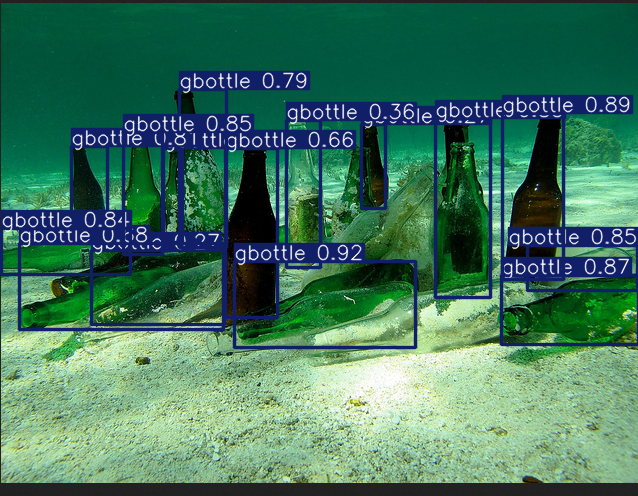

In [ ]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO("/content/60_epochs_denoised.pt")
results = model("/content/Capture.PNG")  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/Screenshot from 2025-03-18 02-00-33.png: 320x640 1 can, 1 electronics, 4 pbags, 1 plastic, 73.1ms
Speed: 7.8ms preprocess, 73.1ms inference, 2.8ms postprocess per image at shape (1, 3, 320, 640)


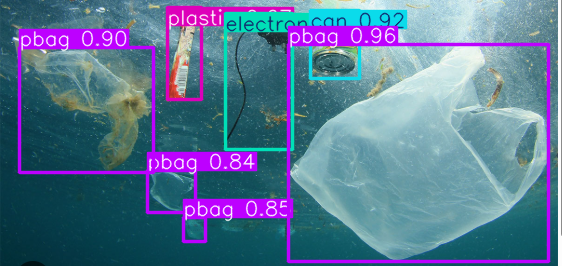

In [ ]:
model = YOLO("/content/60_epochs_denoised.pt")
results = model("/content/Screenshot from 2025-03-18 02-00-33.png")  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/EghTmEqVgAA-sfu (2).jpg: 480x640 1 tire, 73.7ms
Speed: 6.5ms preprocess, 73.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


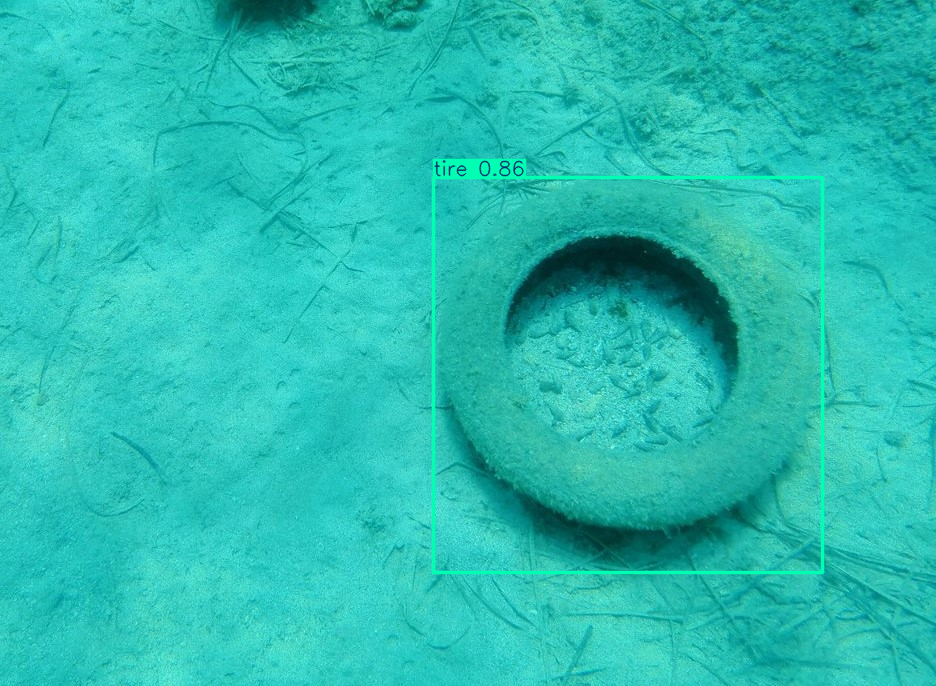

In [ ]:
model = YOLO("/content/60_epochs_denoised.pt")
results = model("/content/EghTmEqVgAA-sfu (2).jpg")  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/60_epochs_denoised.pt")

# Run validation on the dataset
metrics = model.val(data="/content/ocean_waste-1/data.yaml")

# Extract precision, recall, and mAP
precision = metrics.box.map50  # Precision at IoU 0.5
recall = metrics.box.map75     # Recall at IoU 0.75
map50_95 = metrics.box.map     # mAP from IoU 0.5 to 0.95

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"mAP@50-95: {map50_95:.4f}")



Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/ocean_waste-1/valid/labels.cache... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.80it/s]


                   all       1007       1909      0.817      0.746      0.786        0.5
                  Mask         79         92      0.971      0.725       0.88      0.662
                   can         18         20      0.763       0.65      0.663      0.318
             cellphone         61         71      0.962      0.972      0.986      0.875
           electronics         27         40      0.817        0.8      0.822      0.487
               gbottle         36         82      0.733      0.707      0.754      0.532
                 glove         38         57      0.961      0.869      0.919      0.732
                 metal         10         22       0.39      0.409      0.326      0.174
                  misc         48         51      0.702      0.686      0.707      0.373
                   net        147        149      0.922      0.873      0.935      0.656
                  pbag        291        331      0.896      0.967       0.97      0.823
               pbottl

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/60_epochs_denoised.pt")

# Run inference (prediction) on test images
results = model.predict(source="/content/ocean_waste-1/test/images", conf=0.15)


image 1/501 /content/ocean_waste-1/test/images/1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd30463da5e4b94a48be.jpg: 640x640 1 glove, 1 net, 29.3ms
image 2/501 /content/ocean_waste-1/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 640x640 1 Mask, 2 pbags, 3 pbottles, 40.1ms
image 3/501 /content/ocean_waste-1/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 640x640 1 can, 1 pbag, 3 plastics, 16.5ms
image 4/501 /content/ocean_waste-1/test/images/7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 640x640 1 Mask, 16.4ms
image 5/501 /content/ocean_waste-1/test/images/GettyImages-1227891345-1000x667_jpg.rf.32ae9a5a4e410851af33ae743636ac1a.jpg: 640x640 1 Mask, 1 pbag, 16.4ms
image 6/501 /content/ocean_waste-1/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 640x640 1 Mask, 1 plastic, 23.6ms
image 7/501 /content/ocean_waste-1/test/images/STOCK_DSC81

In [ ]:
model = YOLO("/content/60_epochs_denoised.pt")

# Run validation on the dataset
metrics = model.val(data="/content/ocean_waste-1/data.yaml")

# Extract precision, recall, and mAP
precision = metrics.box.map50  # Precision at IoU 0.5
recall = metrics.box.map50     # Recall at IoU 0.75
map50_95 = metrics.box.map     # mAP from IoU 0.5 to 0.95

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"mAP@50-95: {map50_95:.4f}")

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/ocean_waste-1/valid/labels.cache... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:15<00:00,  4.07it/s]


                   all       1007       1909      0.817      0.746      0.786        0.5
                  Mask         79         92      0.971      0.725       0.88      0.662
                   can         18         20      0.763       0.65      0.663      0.318
             cellphone         61         71      0.962      0.972      0.986      0.875
           electronics         27         40      0.817        0.8      0.822      0.487
               gbottle         36         82      0.733      0.707      0.754      0.532
                 glove         38         57      0.961      0.869      0.919      0.732
                 metal         10         22       0.39      0.409      0.326      0.174
                  misc         48         51      0.702      0.686      0.707      0.373
                   net        147        149      0.922      0.873      0.935      0.656
                  pbag        291        331      0.896      0.967       0.97      0.823
               pbottl

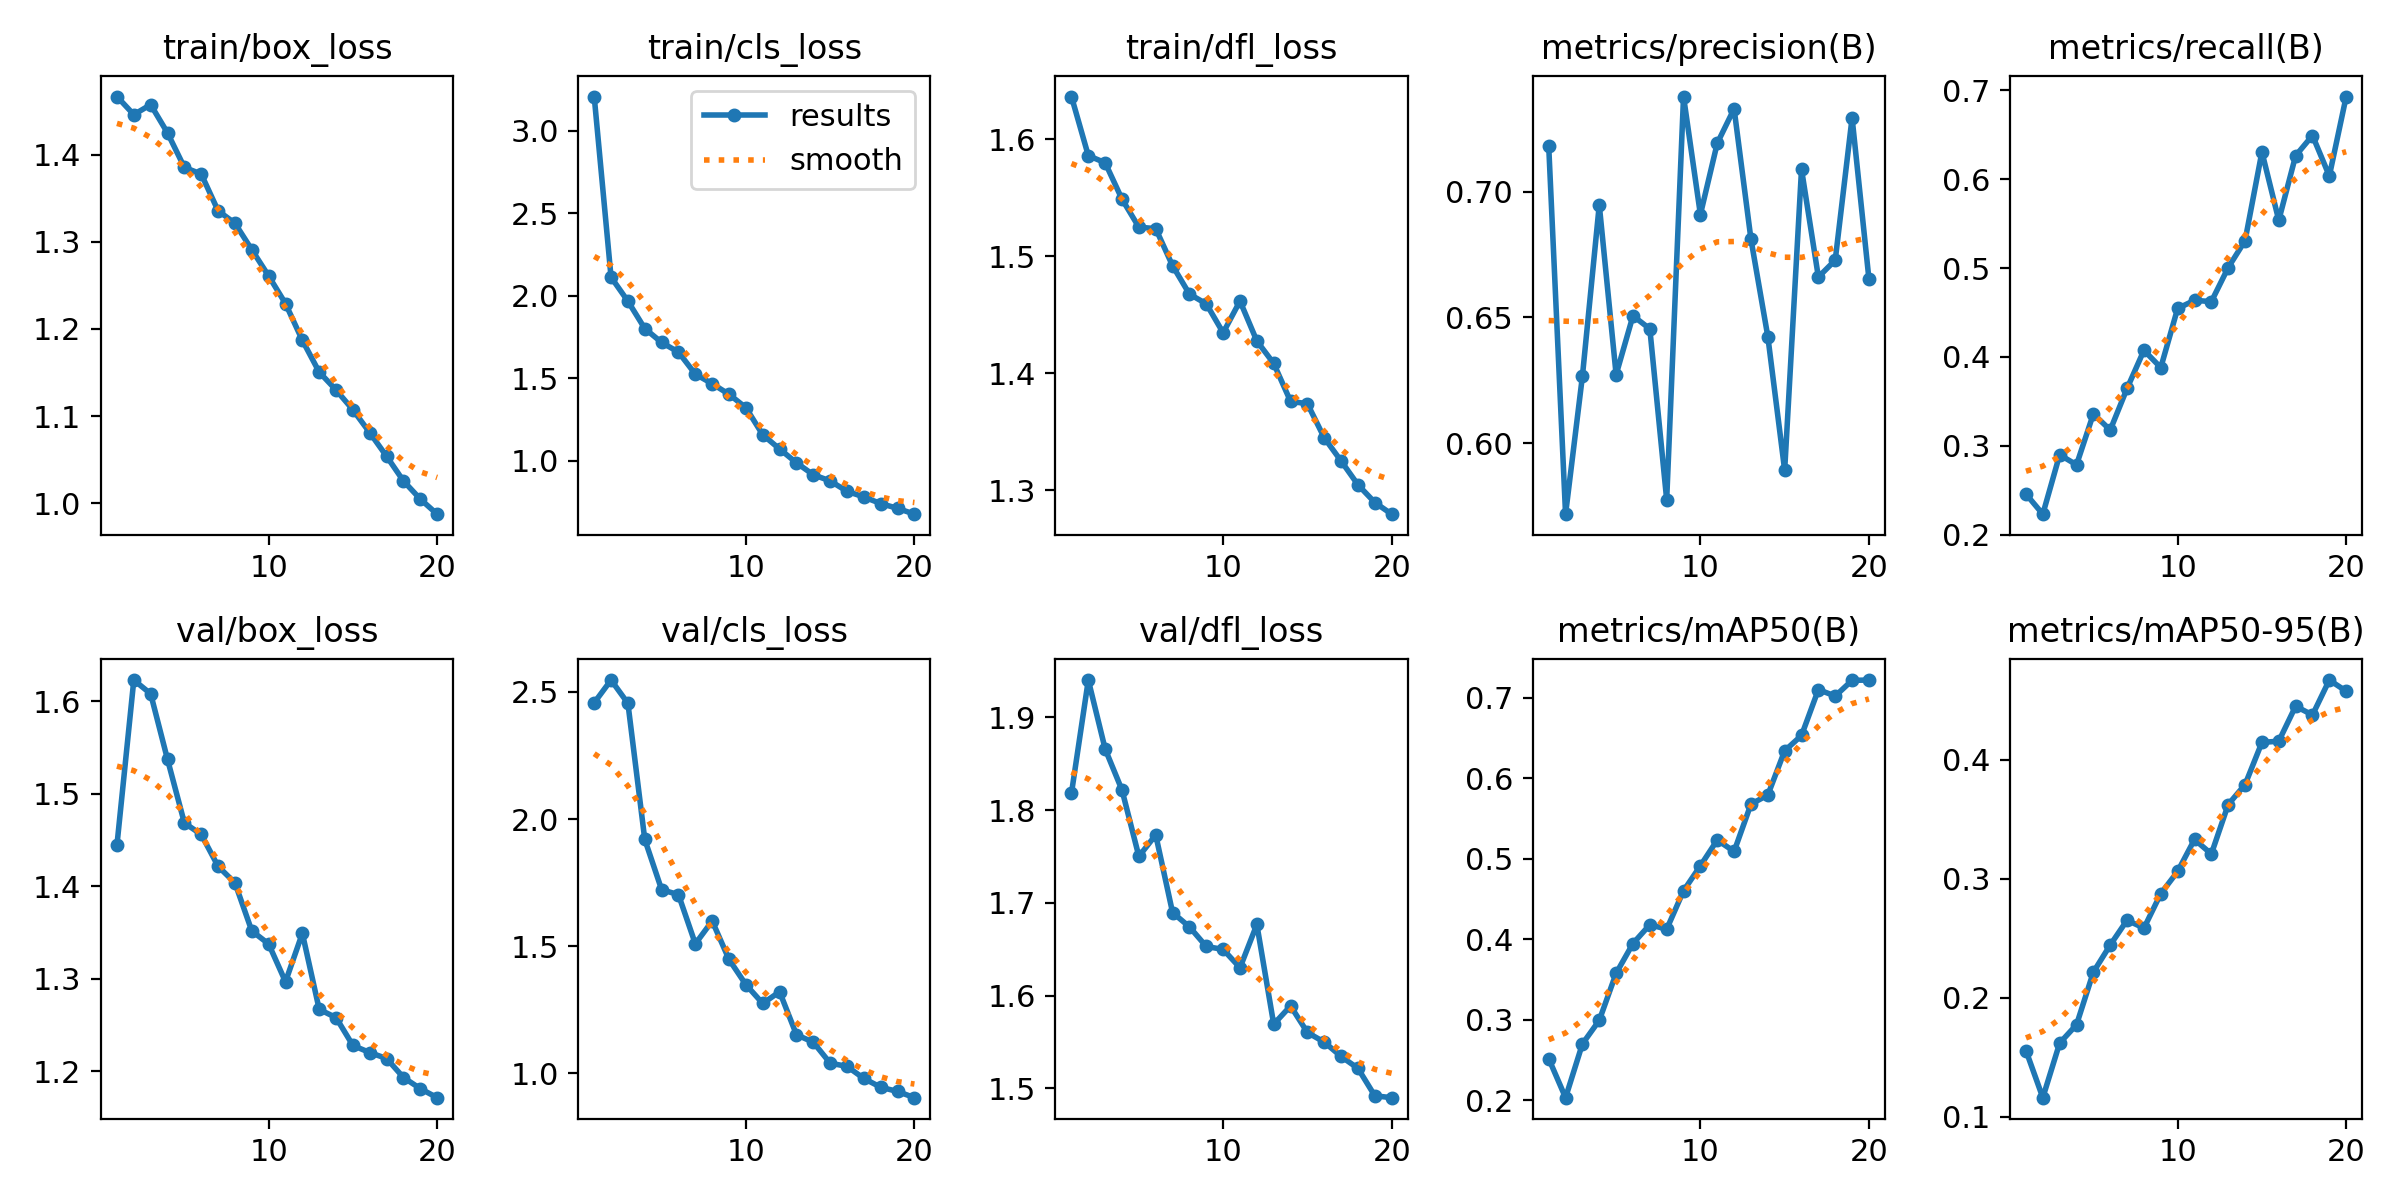

In [ ]:
from IPython.display import display
from PIL import Image

# Load and display the loss curve image
display(Image.open('/content/runs/detect/train/results.png'))


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/60_epochs_denoised.pt")

# Run validation
metrics = model.val(data="/content/ocean_waste-1/data.yaml")

# Extract confusion matrix
conf_matrix = metrics.confusion_matrix  # Correct way to access it

# Print confusion matrix
print(conf_matrix)


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/ocean_waste-1/valid/labels.cache... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:15<00:00,  4.09it/s]


                   all       1007       1909      0.817      0.746      0.786        0.5
                  Mask         79         92      0.971      0.725       0.88      0.662
                   can         18         20      0.763       0.65      0.663      0.318
             cellphone         61         71      0.962      0.972      0.986      0.875
           electronics         27         40      0.817        0.8      0.822      0.487
               gbottle         36         82      0.733      0.707      0.754      0.532
                 glove         38         57      0.961      0.869      0.919      0.732
                 metal         10         22       0.39      0.409      0.326      0.174
                  misc         48         51      0.702      0.686      0.707      0.373
                   net        147        149      0.922      0.873      0.935      0.656
                  pbag        291        331      0.896      0.967       0.97      0.823
               pbottl

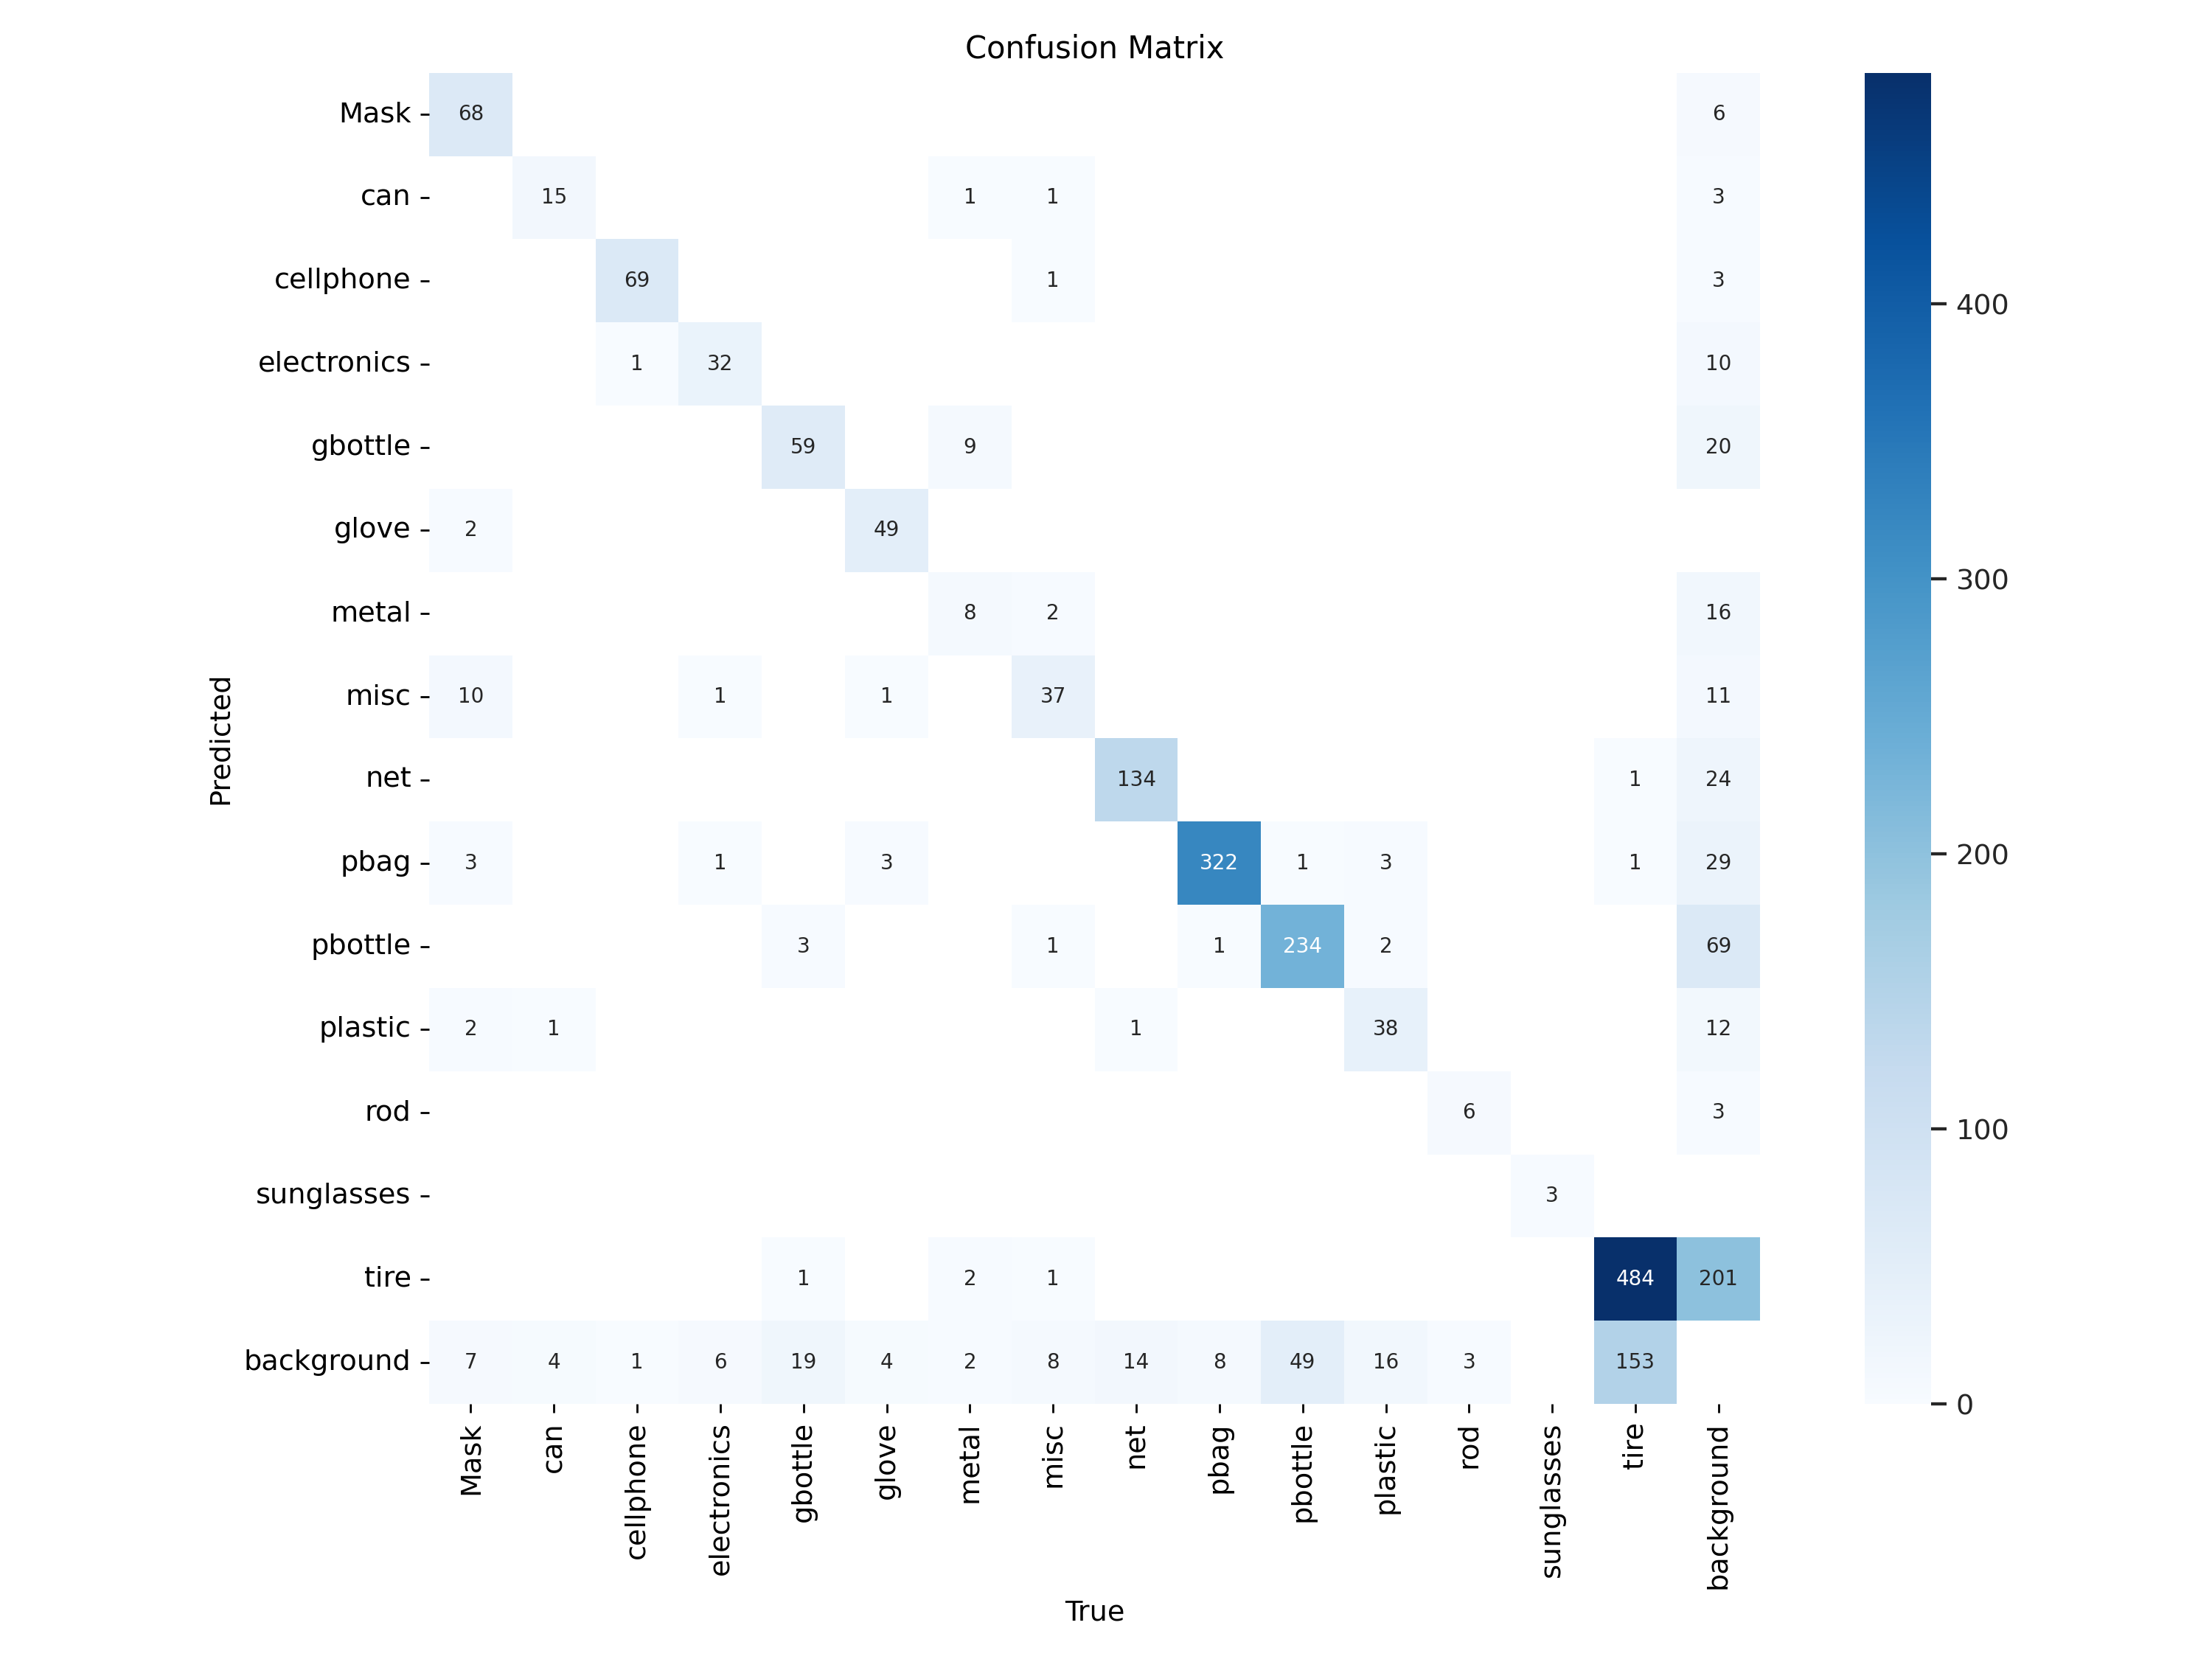

In [ ]:
display(Image.open("/content/runs/detect/val4/confusion_matrix.png"))

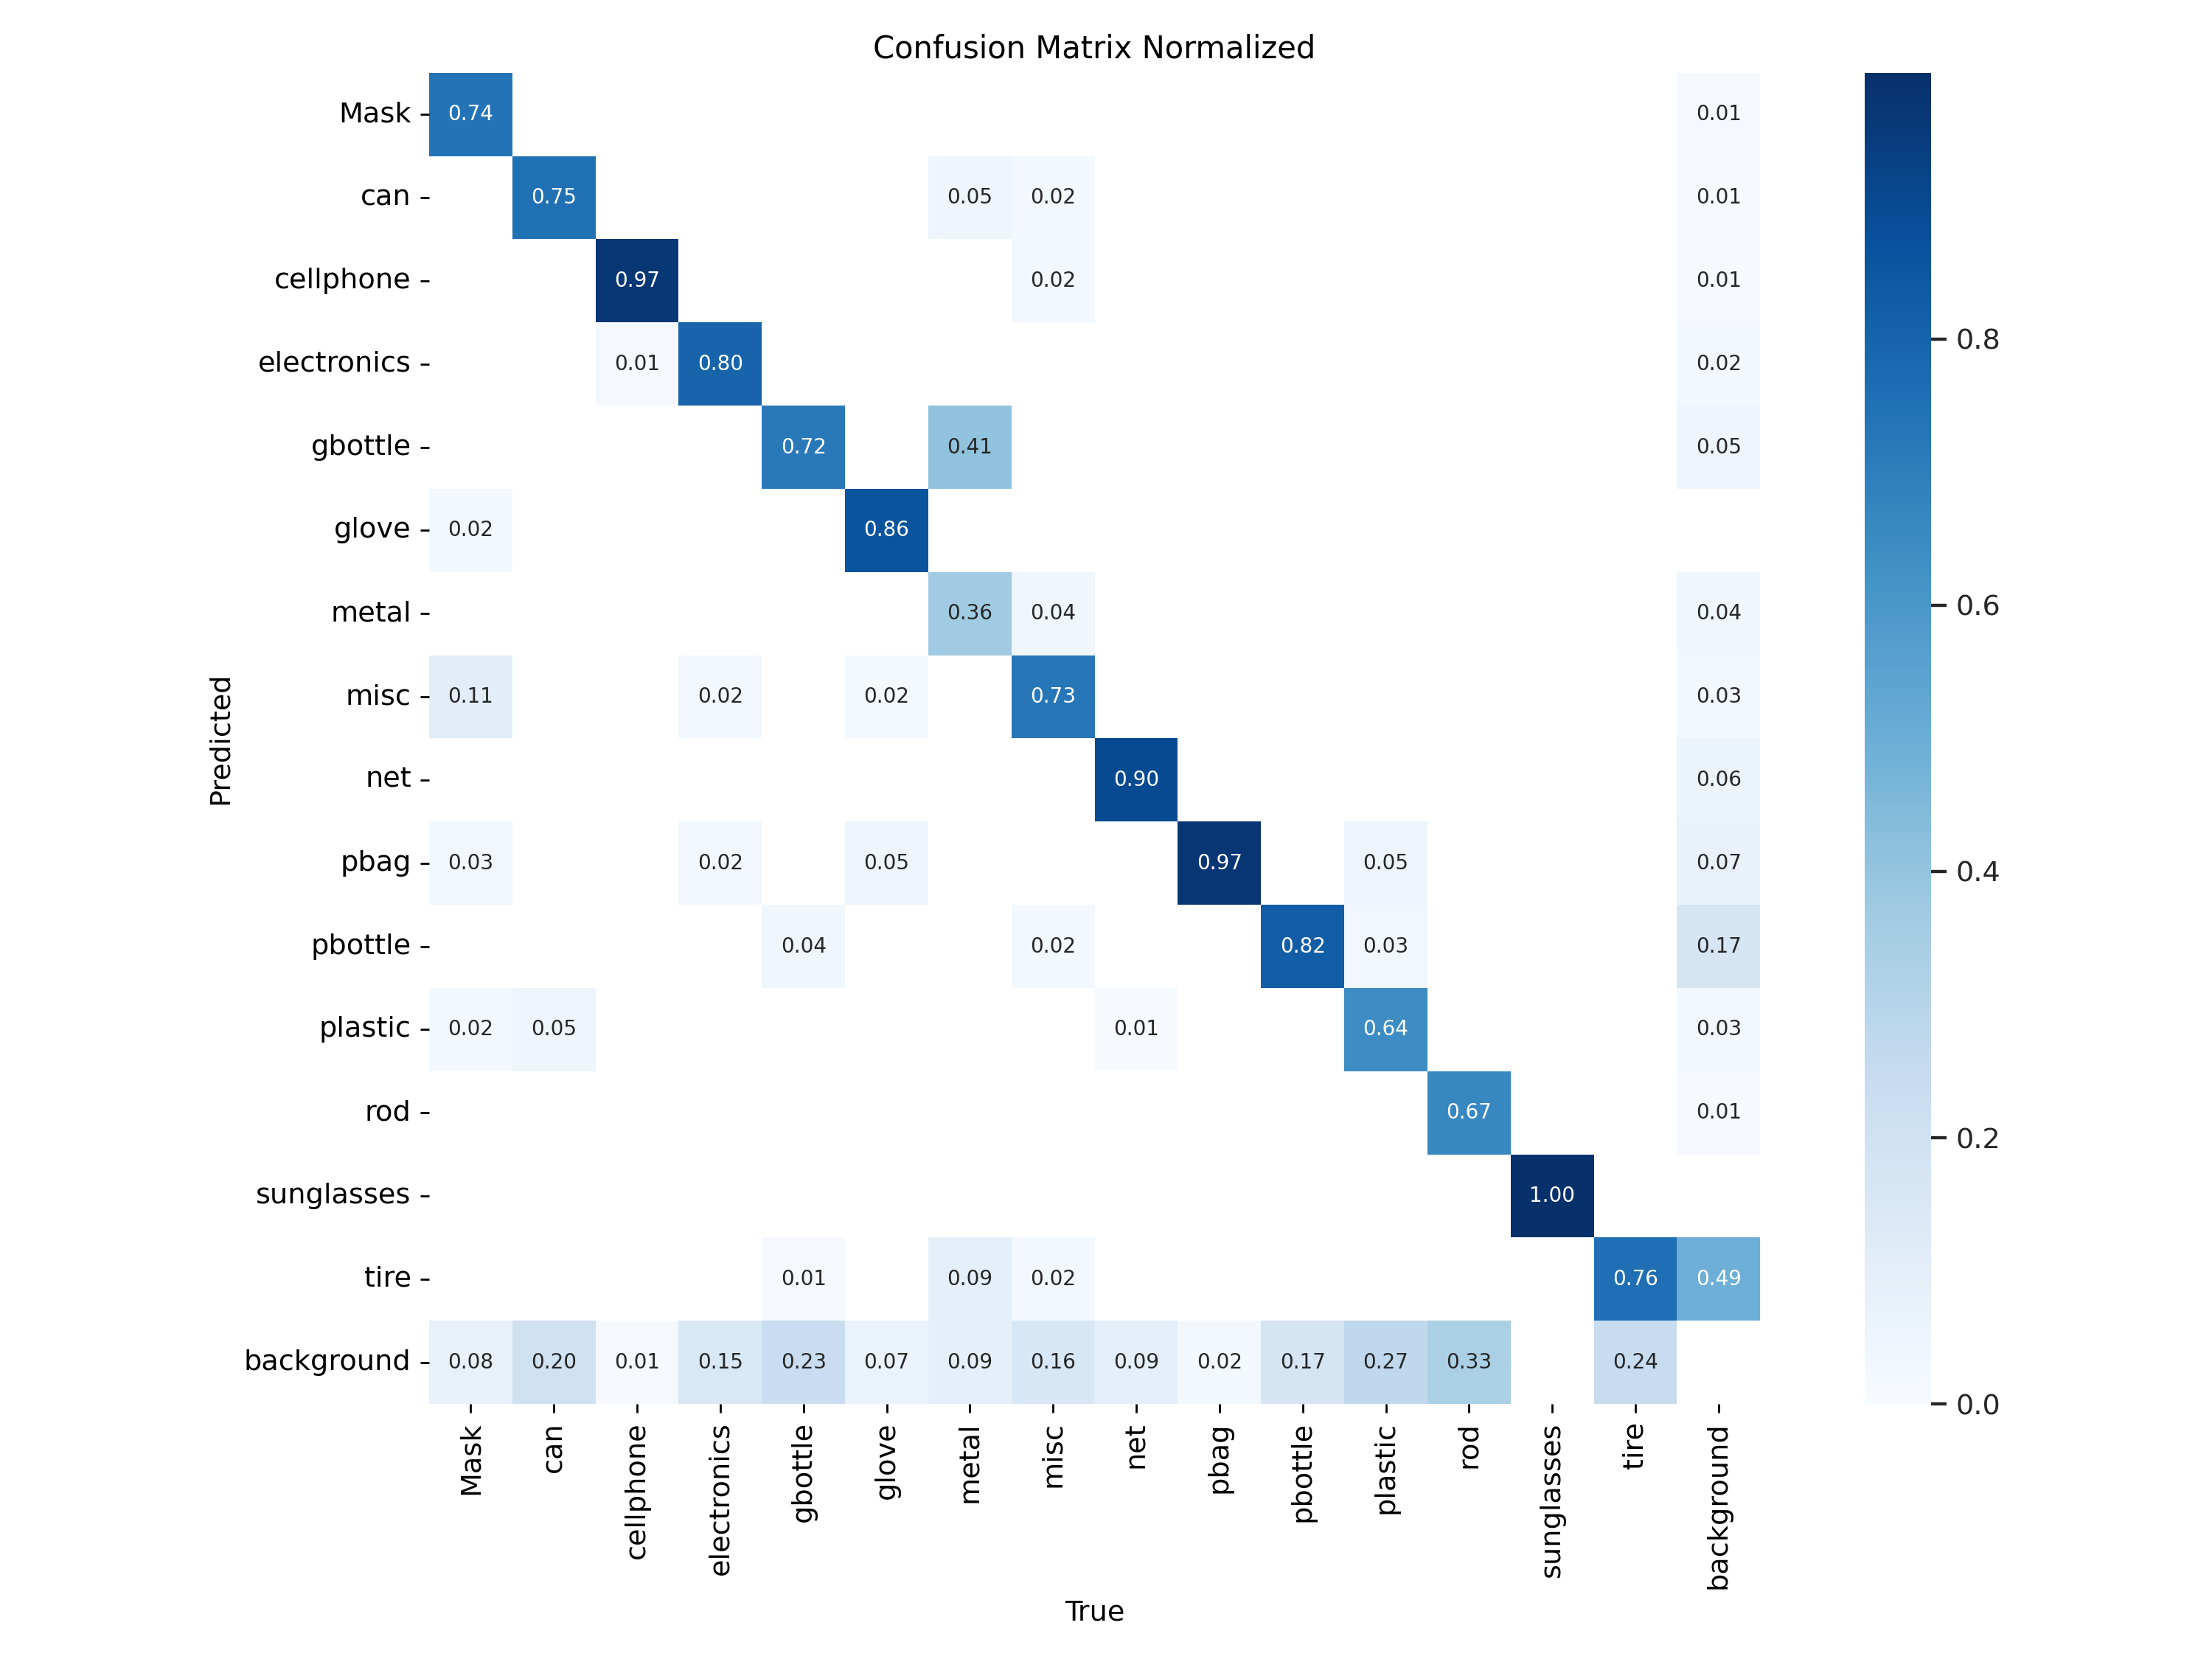

In [ ]:
display(Image.open("/content/runs/detect/val4/confusion_matrix_normalized.png"))